In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns


In [2]:
AQ_data_dr = "./data/"
ds = pd.read_csv(AQ_data_dr+"UKAIRAirQuality_digitaltwin_1h.csv")

/var/folders/3r/rtlnqdhs2252wkq2f4bdx2fc0000gn/T/ipykernel_14055/3706942853.py:2: DtypeWarning: Columns (22,23,27,28,30,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  ds = pd.read_csv(AQ_data_dr+"UKAIRAirQuality_digitaltwin_1h.csv")


In [3]:
ds.head()

,Unnamed: 0,Date,time,PM10 particulate matter (Hourly measured),status,unit,Nitric oxide,status.1,unit.1,Nitrogen dioxide,...,unit.8,Volatile PM2.5 (Hourly measured),status.9,unit.9,PM<sub>10</sub> particulate matter (Hourly measured),Non-volatile PM<sub>10</sub> (Hourly measured),Non-volatile PM<sub>2.5</sub> (Hourly measured),PM<sub>2.5</sub> particulate matter (Hourly measured),Volatile PM<sub>10</sub> (Hourly measured),Volatile PM<sub>2.5</sub> (Hourly measured)
0,0,01-01-2001,01:00,31.0,R,ugm-3 (GRAV EQ),1.0,R,ugm-3,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,01-01-2001,02:00,25.0,R,ugm-3 (GRAV EQ),0.0,R,ugm-3,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,01-01-2001,03:00,25.0,R,ugm-3 (GRAV EQ),0.0,R,ugm-3,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,01-01-2001,04:00,22.0,R,ugm-3 (GRAV EQ),0.0,R,ugm-3,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,01-01-2001,05:00,29.0,R,ugm-3 (GRAV EQ),0.0,R,ugm-3,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
ds['time'][ds['time'] == '24:00'] = '00:00'

/var/folders/3r/rtlnqdhs2252wkq2f4bdx2fc0000gn/T/ipykernel_14055/909258108.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ds['time'][ds['time'] == '24:00'] = '00:00'
/var/folders/3r/rtlnqdhs2252wkq2f4bdx2fc0000gn/T/ipykernel_14055/90925

In [5]:
ds['time'][ds['time'] == '24:00']

Series([], Name: time, dtype: object)

In [6]:
ds["date"] = pd.to_datetime(ds['Date'] + ' ' + ds['time'], format = "%d-%m-%Y %H:%M")
ds = ds.drop(columns=["Date", "time"])

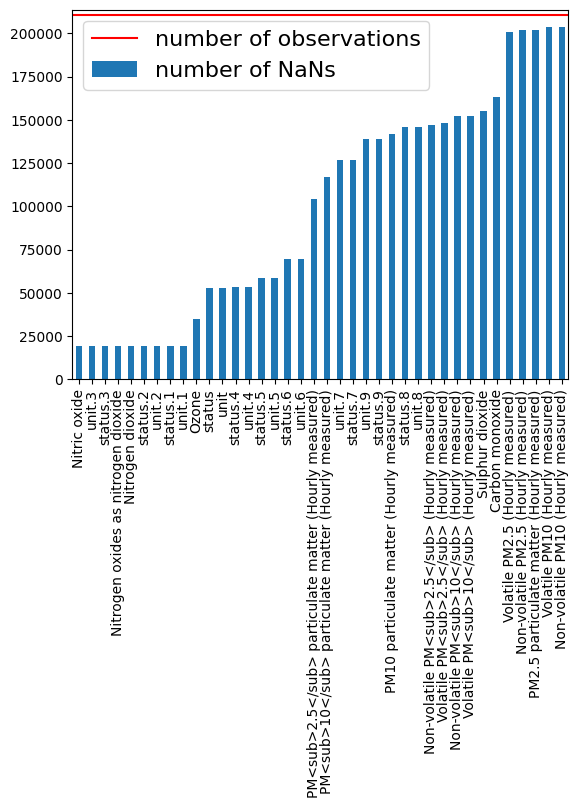

In [7]:
# Missing values
missing = ds.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
f, ax = plt.subplots()


missing.plot.bar(label="number of NaNs");
plt.axhline(y=ds.shape[0], color="red", label="number of observations")
plt.legend(fontsize=16);

In [8]:
def plot_timeseries(df, columns):
    colors = cm.rainbow(np.linspace(0, 1, len(columns)))

    fig, axes = plt.subplots(nrows=len(columns),ncols=1, sharex=True, figsize=(8,8))

    for i in range(len(columns)):
        axes[i].plot(pd.to_datetime(df["date"]).dt.date, df[columns[i]].astype(float), label=str(columns[i]),\
                    color=colors[i])
        xmin, xmax = axes[i].get_xlim()
        N=10
        axes[i].set_xticks(np.round(np.linspace(xmin, xmax, N)))


        axes[i].xaxis.set_tick_params(rotation=45)
    fig.legend(bbox_to_anchor=(1.15, .75))
    plt.xlabel("time")


    plt.show()

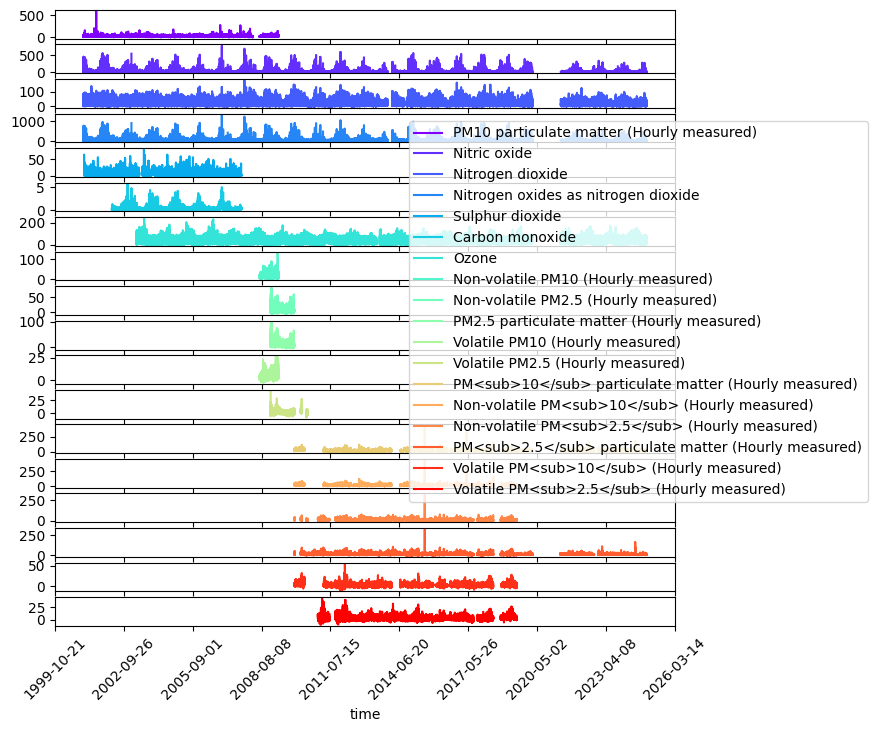

In [9]:
plot_timeseries(ds, ds.select_dtypes(include=['float64']).columns)

In [10]:
def quantiles_check(df, columns, ql=0.009, qh=0.999):
    q_low = df[columns[0::]].quantile(ql)
    q_hi  = df[columns[0::]].quantile(qh)
    
    df_return = df.copy()
    df_return[columns[0::]] = np.where( ((df[columns[0::]] < q_hi) & (df[columns[0::]] > q_low)), df[columns[0::]], np.nan)
    return df_return

In [11]:
ds_dq = quantiles_check(ds, ds.select_dtypes(include=['float64']).columns)

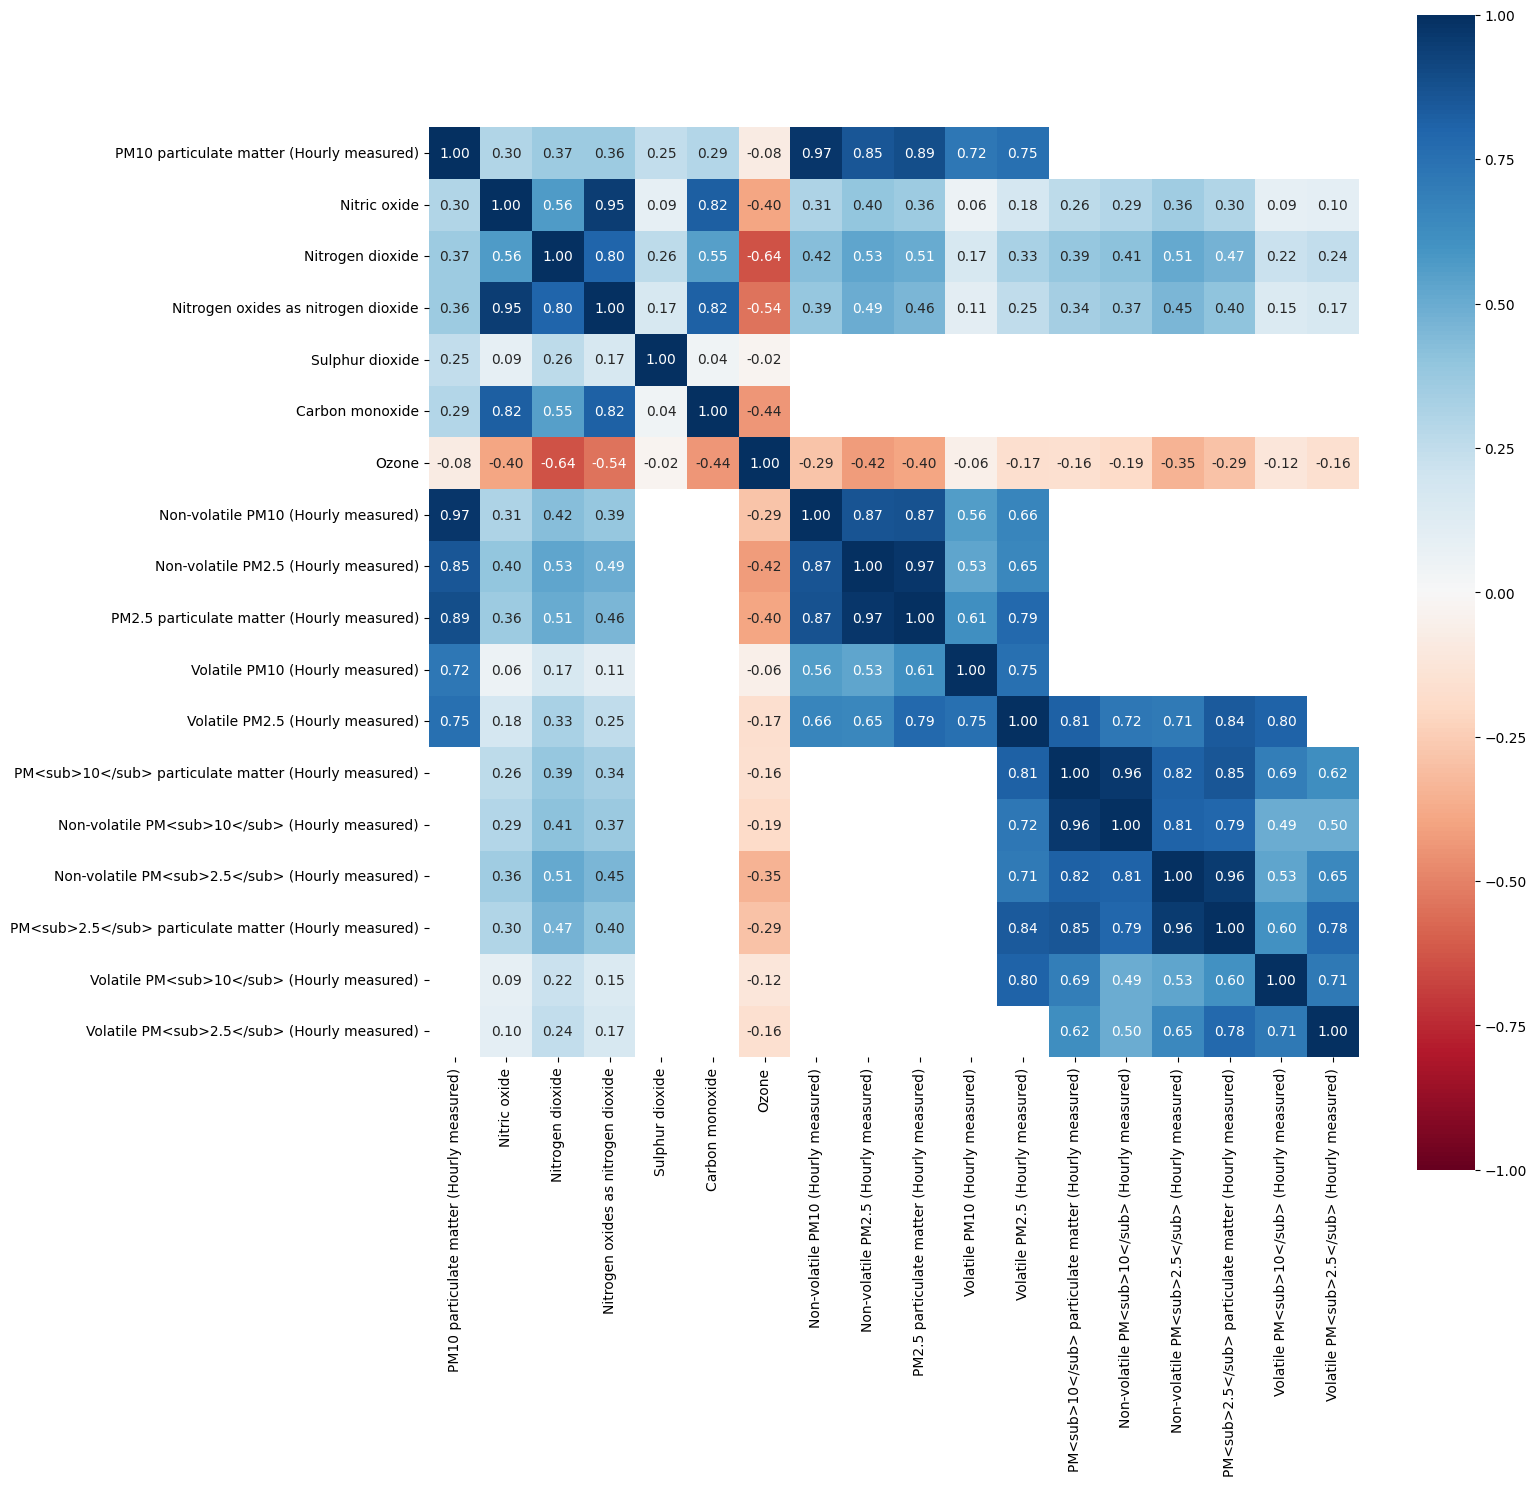

In [12]:
corrmat = ds_dq[ds_dq.select_dtypes(include=['float64']).columns].astype(float).corr().dropna(how="all", axis="columns").dropna(how="all", axis="rows")
f, ax = plt.subplots( figsize=(15, 15))
fig = sns.heatmap(corrmat, vmax=1, square=True, cmap="RdBu",  annot=True, vmin=-1, fmt=".2f");

plt.show()

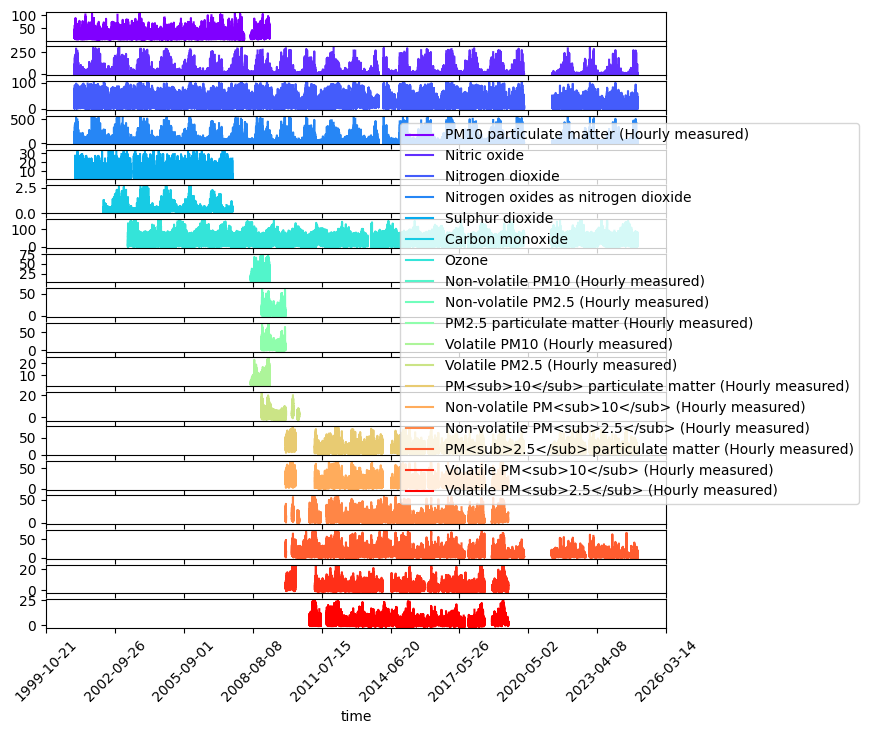

In [13]:
plot_timeseries(ds_dq, ds_dq.select_dtypes(include=['float64']).columns)

In [14]:
ds_dq['hour'] = ds_dq["date"].dt.hour
ds_dq['weekday'] = ds_dq["date"].dt.dayofweek  # 0 = Monday
ds_dq['month'] = ds_dq["date"].dt.month

# Create template: median pollutant concentration by hour, weekday, month
pollutants = ['Nitric oxide', 'Nitrogen dioxide', 'Ozone']  # Or whatever your columns are

templates = {
    p: ds_dq.groupby(['month', 'weekday', 'hour'])[p].median()
    for p in pollutants
}

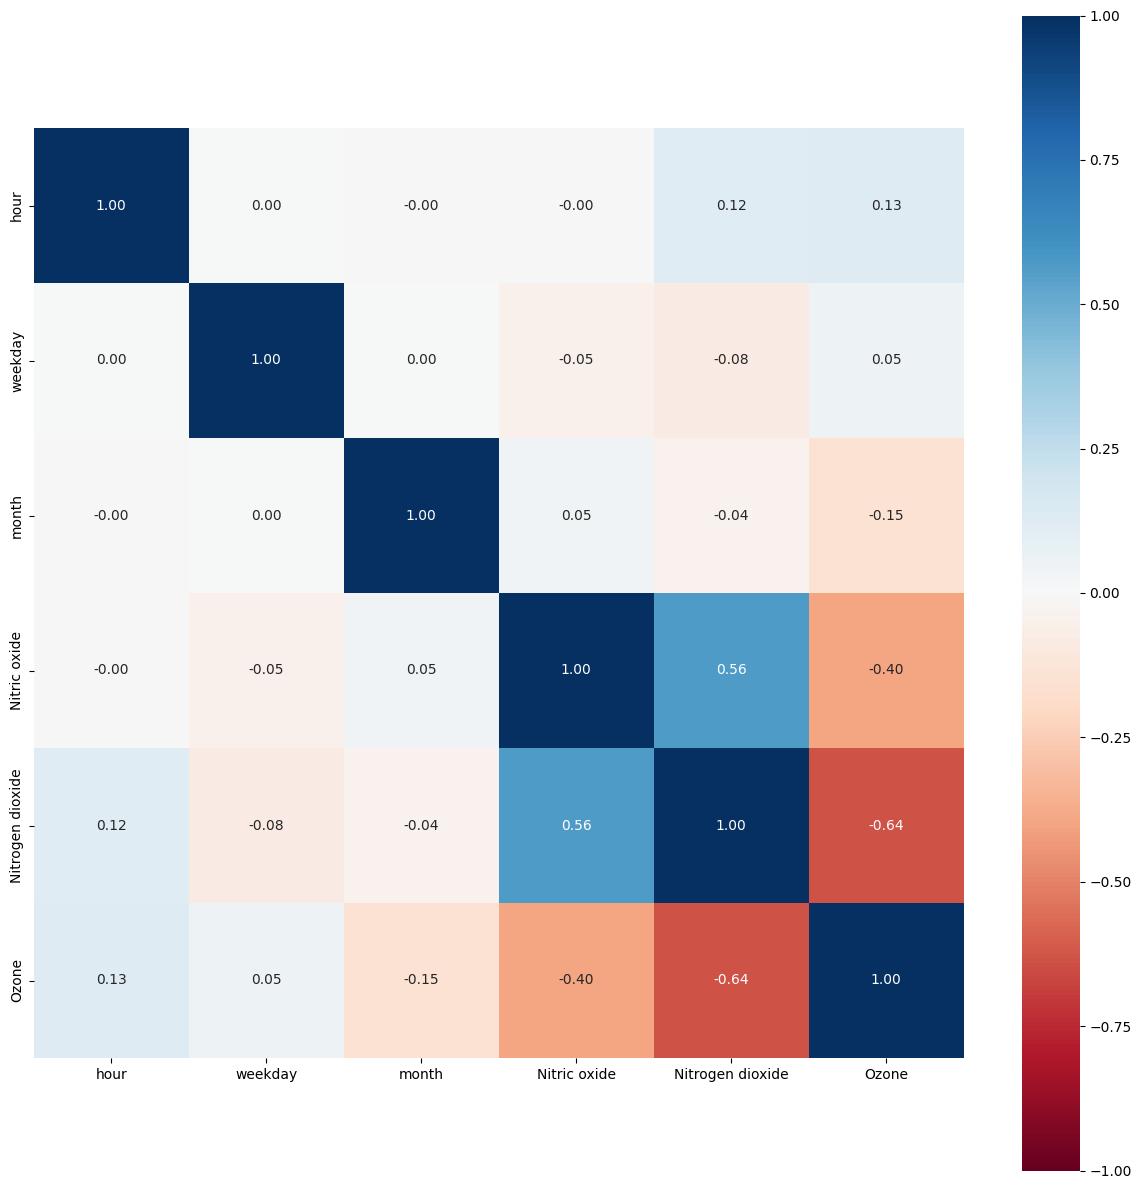

In [15]:
corrmat = ds_dq[['hour', 'weekday', 'month', 'Nitric oxide', 'Nitrogen dioxide', 'Ozone']].astype(float).corr().dropna(how="all", axis="columns").dropna(how="all", axis="rows")
f, ax = plt.subplots( figsize=(15, 15))
fig = sns.heatmap(corrmat, vmax=1, square=True, cmap="RdBu",  annot=True, vmin=-1, fmt=".2f");

plt.show()

In [16]:
def impute_pollutant(row, col):
    if pd.notna(row[col]):
        return row[col]
    key = (row['month'], row['weekday'], row['hour'])
    return templates[col].get(key, np.nan)  # fallback to NaN if no match

# Apply imputation
for p in pollutants:
    ds_dq[f'{p}_imputed'] = ds_dq.apply(lambda row: impute_pollutant(row, p), axis=1)

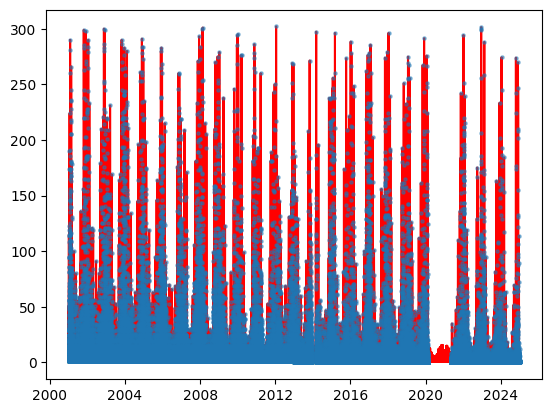

In [17]:
plt.scatter(ds_dq["date"], ds_dq['Nitric oxide'], s=5, alpha=0.5)

plt.plot(ds_dq["date"], ds_dq['Nitric oxide_imputed'], color="red", zorder=0)

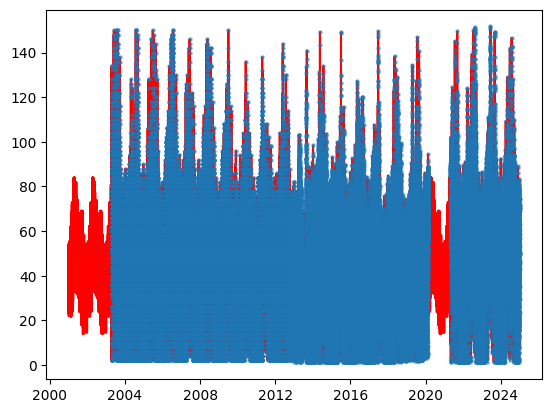

In [18]:
plt.scatter(ds_dq["date"], ds_dq['Ozone'], s=5, alpha=0.5)

plt.plot(ds_dq["date"], ds_dq['Ozone_imputed'], color="red", zorder=0)

# in 2020 the gap is too big to be accurately imputed with this method. We can use instead regression

In [19]:
from sklearn.ensemble import RandomForestRegressor

mask_train = ds_dq['Nitric oxide'].notna()
features = ['hour', 'weekday', 'month', 'Nitrogen dioxide', 'Ozone']
X_train = ds_dq.loc[mask_train, features]
y_train = ds_dq.loc[mask_train, 'Nitric oxide']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [20]:
mask_missing = ds_dq['Nitric oxide'].isna()
X_missing = ds_dq.loc[mask_missing, features]

ds_dq.loc[mask_missing, 'Nitric oxide_imputed'] = model.predict(X_missing)

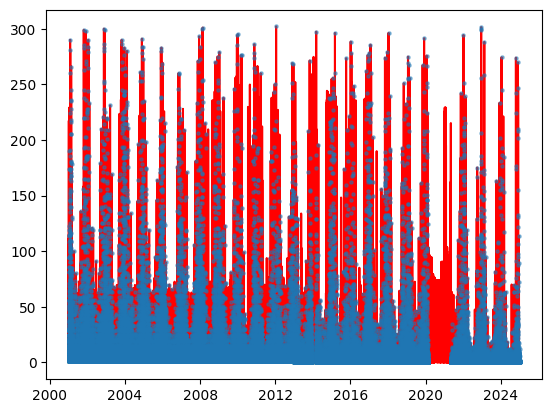

In [21]:
plt.scatter(ds_dq["date"], ds_dq['Nitric oxide'], s=5, alpha=0.5)

plt.plot(ds_dq["date"], ds_dq['Nitric oxide_imputed'], color="red", zorder=0)

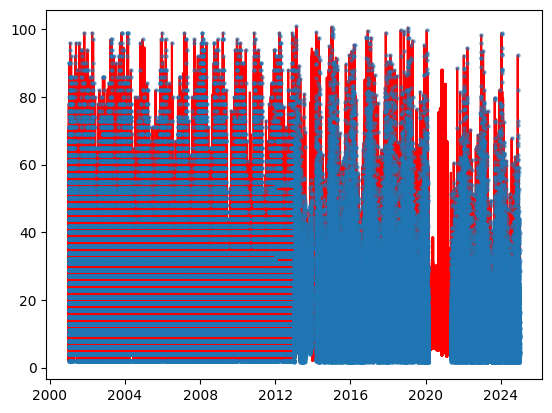

In [22]:
mask_train = ds_dq['Nitrogen dioxide'].notna()
features = ['hour', 'weekday', 'month', 'Nitric oxide', 'Ozone']
X_train = ds_dq.loc[mask_train, features]
y_train = ds_dq.loc[mask_train, 'Nitrogen dioxide']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

mask_missing = ds_dq['Nitrogen dioxide'].isna()
X_missing = ds_dq.loc[mask_missing, features]

ds_dq.loc[mask_missing, 'Nitrogen dioxide_imputed'] = model.predict(X_missing)

plt.scatter(ds_dq["date"], ds_dq['Nitrogen dioxide'], s=5, alpha=0.5)

plt.plot(ds_dq["date"], ds_dq['Nitrogen dioxide_imputed'], color="red", zorder=0)

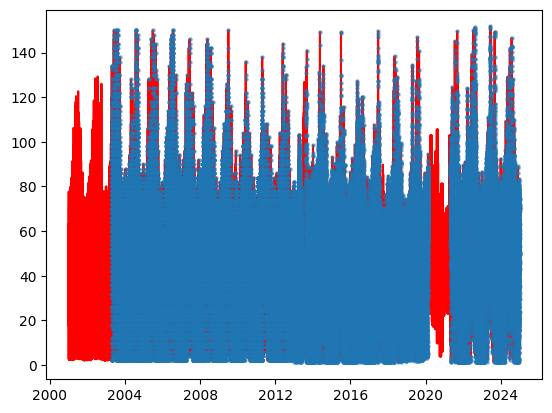

In [23]:
mask_train = ds_dq['Ozone'].notna()
features = ['hour', 'weekday', 'month', 'Nitric oxide', 'Nitrogen dioxide']
X_train = ds_dq.loc[mask_train, features]
y_train = ds_dq.loc[mask_train, 'Ozone']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

mask_missing = ds_dq['Ozone'].isna()
X_missing = ds_dq.loc[mask_missing, features]

ds_dq.loc[mask_missing, 'Ozone_imputed'] = model.predict(X_missing)

plt.scatter(ds_dq["date"], ds_dq['Ozone'], s=5, alpha=0.5)

plt.plot(ds_dq["date"], ds_dq['Ozone_imputed'], color="red", zorder=0)

### Now we combine these results to the main dataset, and check again the correlations and how to fill the gaps in the rest of the dataset

In [24]:
ds_dq[['Nitric oxide', 'Nitrogen dioxide', 'Ozone']] = ds_dq[['Nitric oxide_imputed', 'Nitrogen dioxide_imputed', 'Ozone_imputed']]

In [25]:
ds_dq = ds_dq.drop(columns=['Nitric oxide_imputed', 'Nitrogen dioxide_imputed', 'Ozone_imputed'])

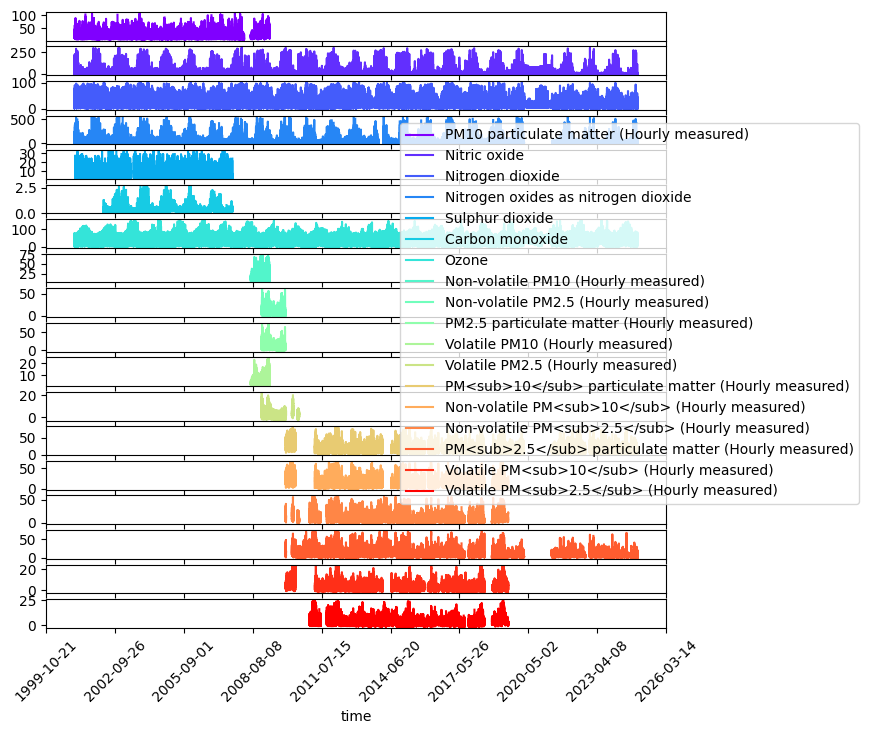

In [26]:
plot_timeseries(ds_dq, ds_dq.select_dtypes(include=['float64']).columns)

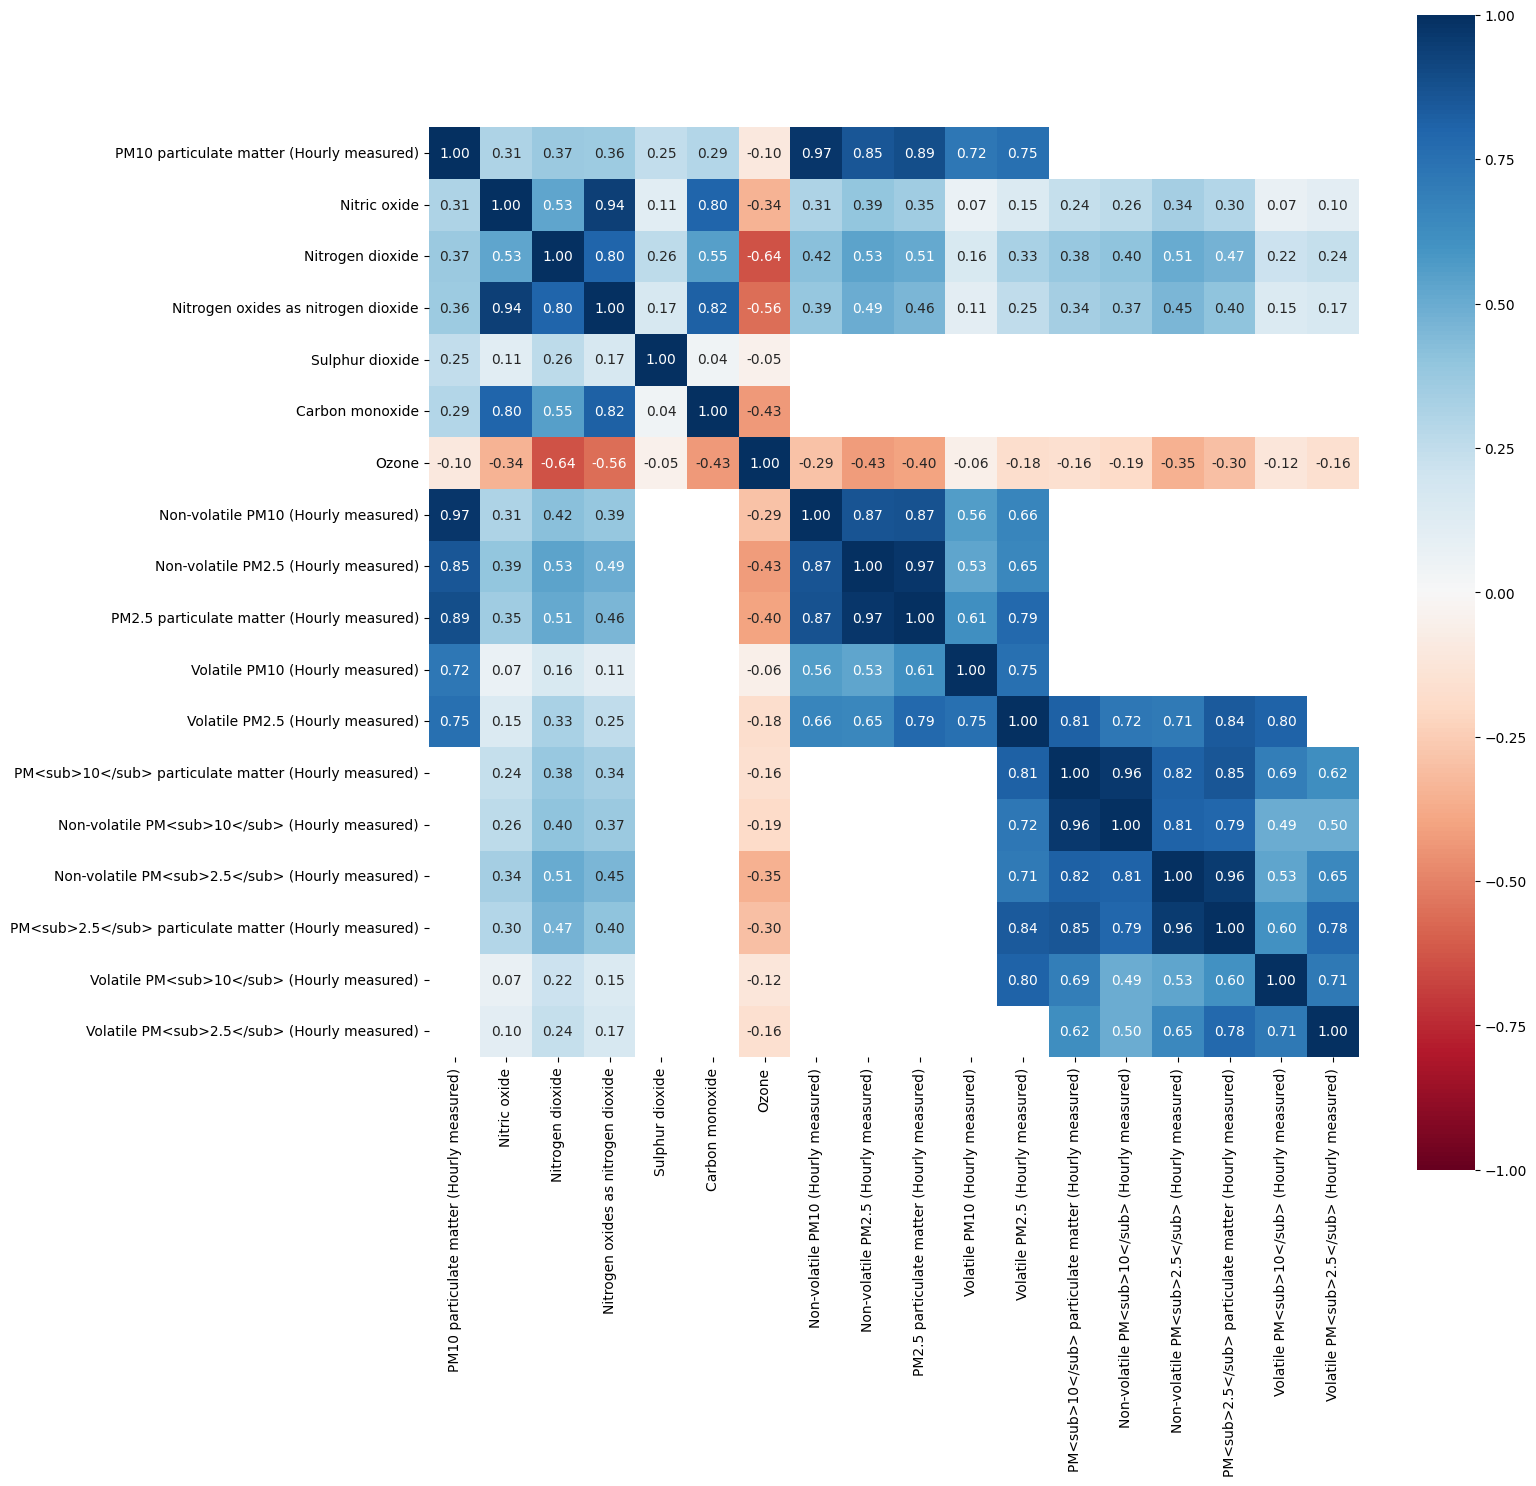

In [27]:
corrmat = ds_dq[ds.select_dtypes(include=['float64']).columns].astype(float).corr().dropna(how="all", axis="columns").dropna(how="all", axis="rows")
f, ax = plt.subplots( figsize=(15, 15))
fig = sns.heatmap(corrmat, vmax=1, square=True, cmap="RdBu",  annot=True, vmin=-1, fmt=".2f");

plt.show()

In [28]:
ds_dq.select_dtypes(include=['float64']).columns

Index(['PM10 particulate matter (Hourly measured)', 'Nitric oxide',
       'Nitrogen dioxide', 'Nitrogen oxides as nitrogen dioxide',
       'Sulphur dioxide', 'Carbon monoxide', 'Ozone',
       'Non-volatile PM10 (Hourly measured)',
       'Non-volatile PM2.5 (Hourly measured)',
       'PM2.5 particulate matter (Hourly measured)',
       'Volatile PM10 (Hourly measured)', 'Volatile PM2.5 (Hourly measured)',
       'PM<sub>10</sub> particulate matter (Hourly measured)',
       'Non-volatile PM<sub>10</sub> (Hourly measured)',
       'Non-volatile PM<sub>2.5</sub> (Hourly measured)',
       'PM<sub>2.5</sub> particulate matter (Hourly measured)',
       'Volatile PM<sub>10</sub> (Hourly measured)',
       'Volatile PM<sub>2.5</sub> (Hourly measured)'],
      dtype='object')

## we keep the chemicals of interests

In [29]:
columns_of_interest = ['PM10 particulate matter (Hourly measured)', 'Nitric oxide',
       'Nitrogen dioxide','Sulphur dioxide', 'Carbon monoxide', 'Ozone']

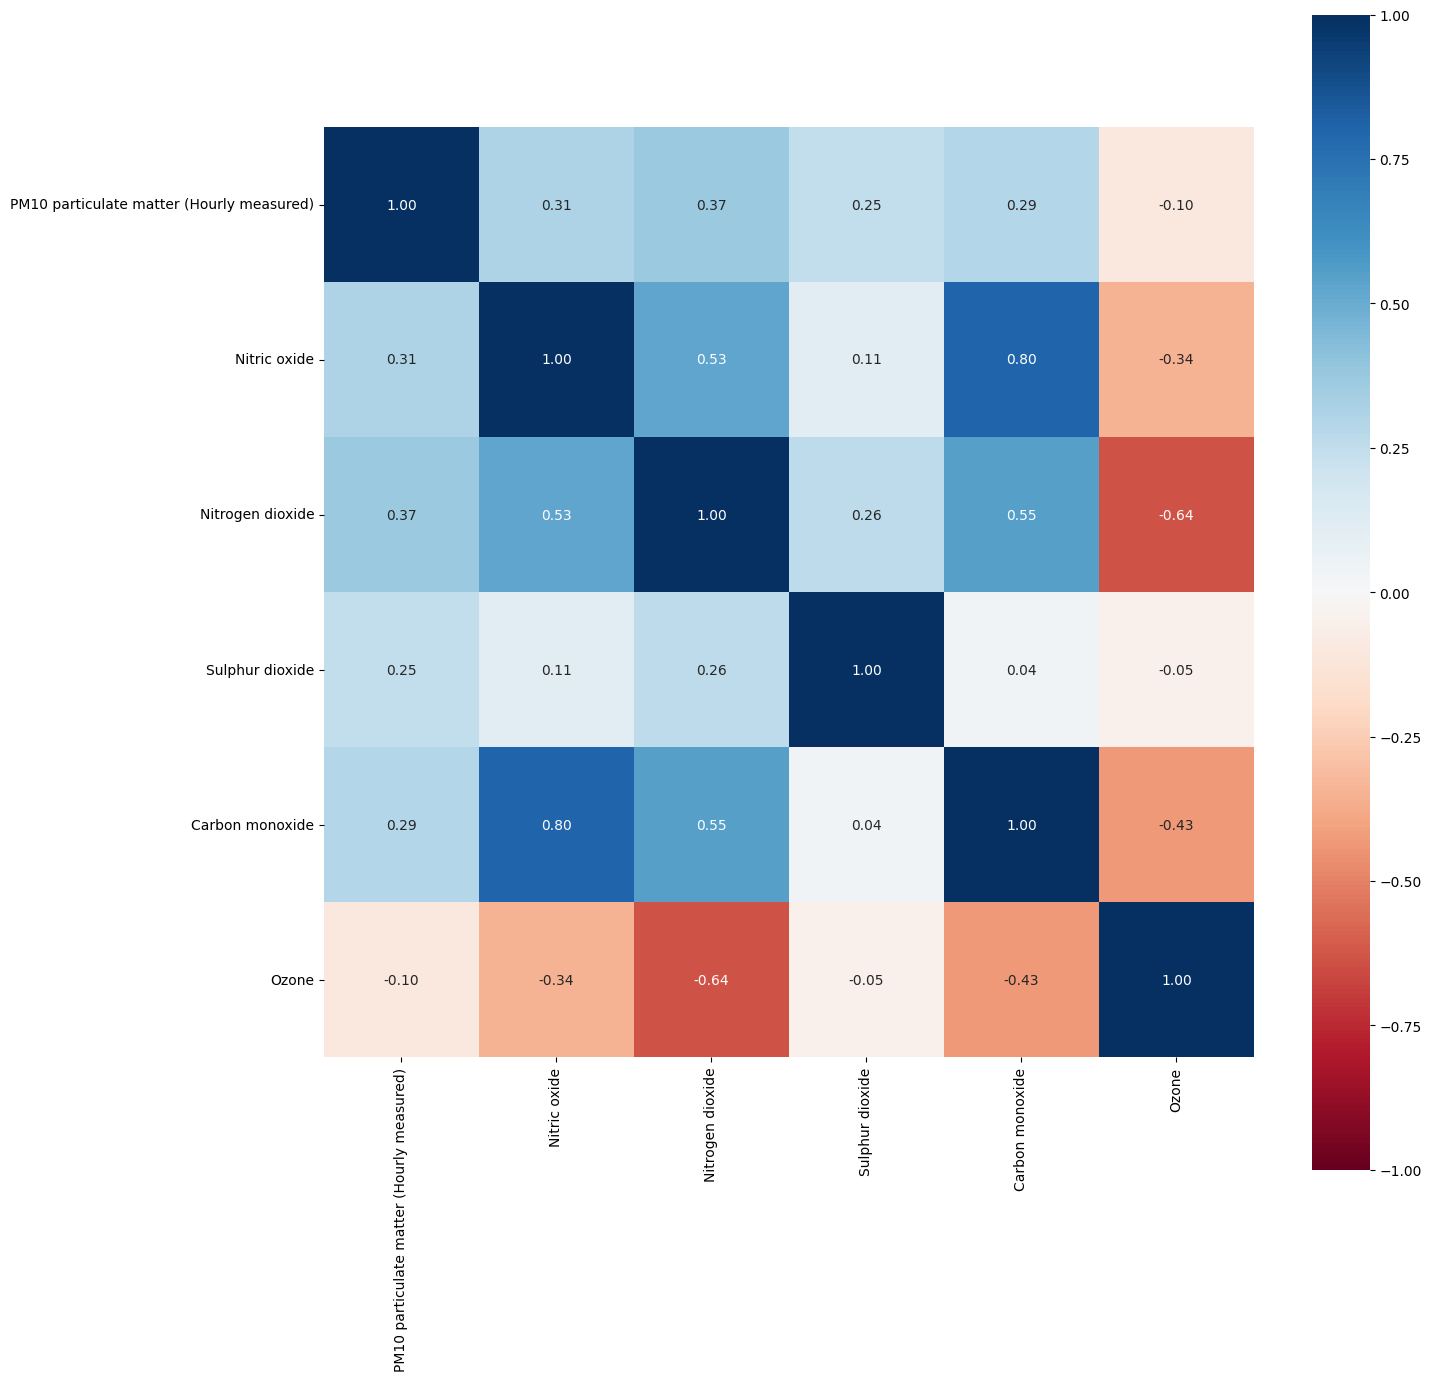

In [30]:
corrmat = ds_dq[columns_of_interest].astype(float).corr().dropna(how="all", axis="columns").dropna(how="all", axis="rows")
f, ax = plt.subplots( figsize=(15, 15))
fig = sns.heatmap(corrmat, vmax=1, square=True, cmap="RdBu",  annot=True, vmin=-1, fmt=".2f");

plt.show()

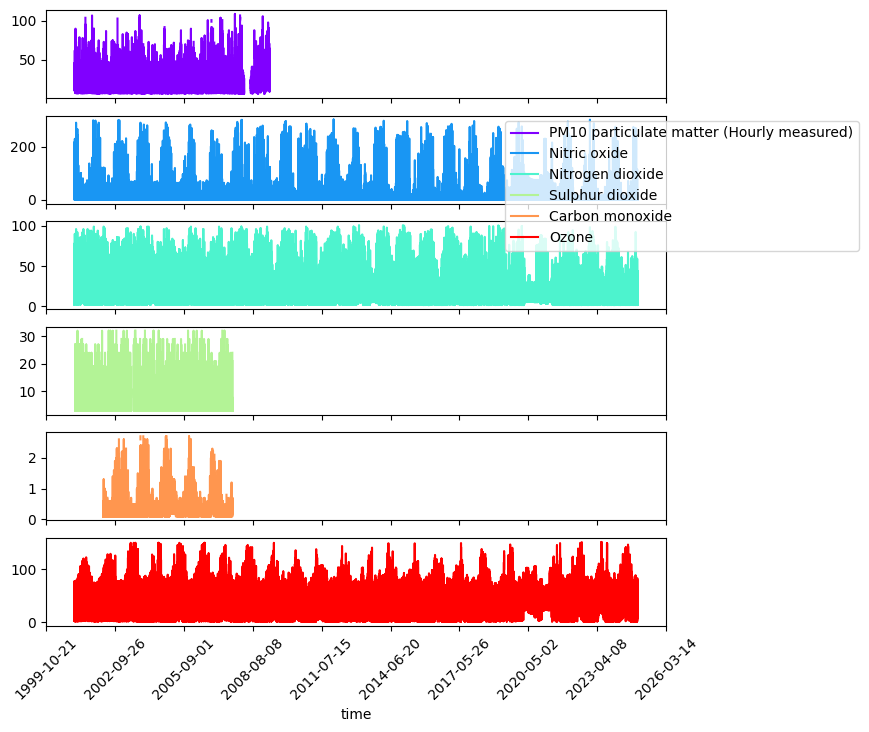

In [31]:
plot_timeseries(ds_dq, columns_of_interest)

In [32]:
features = [ 'Nitric oxide', 'Nitrogen dioxide', 'Ozone', 'PM10 particulate matter (Hourly measured)', 'Carbon monoxide', 'hour',
       'weekday', 'month',]

In [33]:
ds_dq[features + ["Sulphur dioxide"]].corr()["Sulphur dioxide"].sort_values(ascending=False)


Sulphur dioxide                              1.000000
Nitrogen dioxide                             0.262256
PM10 particulate matter (Hourly measured)    0.247952
Nitric oxide                                 0.110396
hour                                         0.079506
Carbon monoxide                              0.044243
weekday                                     -0.015848
Ozone                                       -0.053434
month                                       -0.070102
Name: Sulphur dioxide, dtype: float64

In [34]:
ds_dq['hour_sin'] = np.sin(2 * np.pi * ds_dq['hour'] / 24)
ds_dq['hour_cos'] = np.cos(2 * np.pi * ds_dq['hour'] / 24)
ds_dq['weekday_sin'] = np.sin(2 * np.pi * ds_dq['weekday'] / 7)
ds_dq['weekday_cos'] = np.cos(2 * np.pi * ds_dq['weekday'] / 7)
ds_dq['month_sin'] = np.sin(2 * np.pi * ds_dq['month'] / 12)
ds_dq['month_cos'] = np.cos(2 * np.pi * ds_dq['month'] / 12)

In [35]:
features = [ 'Nitric oxide', 'Nitrogen dioxide', 'Ozone', 'PM10 particulate matter (Hourly measured)', 'Carbon monoxide', 'hour',
       'weekday', 'month', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'weekday_cos', 'weekday_sin']

In [36]:
ds_dq[features + ["Sulphur dioxide"]].corr()["Sulphur dioxide"].sort_values(ascending=False)

Sulphur dioxide                              1.000000
Nitrogen dioxide                             0.262256
PM10 particulate matter (Hourly measured)    0.247952
Nitric oxide                                 0.110396
hour                                         0.079506
month_sin                                    0.074334
Carbon monoxide                              0.044243
weekday_sin                                  0.019387
month_cos                                    0.018310
weekday_cos                                 -0.013226
weekday                                     -0.015848
Ozone                                       -0.053434
hour_sin                                    -0.060542
month                                       -0.070102
hour_cos                                    -0.087651
Name: Sulphur dioxide, dtype: float64

In [37]:
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
def impute_pollutant_with_model(df_, target, features, test_frac=0.1, seed=42, plot=True, n_lags=3, rolling_window=None):
    df = df_.copy()
    
    # Create lagged features
    for feat in features:
        for lag in range(1, n_lags + 1):
            df[f'{feat}_lag{lag}'] = df[feat].shift(lag)
    
    # Optionally add rolling mean features (can help smooth noisy features)
    if rolling_window is not None:
        for feat in features:
            df[f'{feat}_rollmean_{rolling_window}'] = df[feat].rolling(window=rolling_window, min_periods=1).mean()

    # Updated feature list with lagged and rolling features
    extended_features = features.copy()
    extended_features += [f'{feat}_lag{lag}' for feat in features for lag in range(1, n_lags + 1)]
    if rolling_window is not None:
        extended_features += [f'{feat}_rollmean_{rolling_window}' for feat in features]

    # Mask rows where target and all extended features are available (no NaNs in those)
    mask_train = df[extended_features + [target]].notna().all(axis=1)
    train_indices = df[mask_train].index

    if len(train_indices) < 10:
        print("Not enough training data.")
        return df_

    # Split train/val sets
    np.random.seed(seed)
    val_indices = np.random.choice(train_indices, size=int(test_frac * len(train_indices)), replace=False)
    train_only_indices = train_indices.difference(val_indices)

    train_mask_final = df.index.isin(train_only_indices)
    val_mask_final = df.index.isin(val_indices)

    # Prepare training data
    X_train = df.loc[train_mask_final, extended_features].dropna()
    y_train = df.loc[X_train.index, target]

    print(f"Training on {len(X_train)} rows for target: {target}")

    # Define stacking model
    model = StackingRegressor(
        estimators=[
            ('rf', RandomForestRegressor(n_estimators=100)),
            ('xgb', XGBRegressor(n_estimators=200, verbosity=0)),
            ('ridge', make_pipeline(StandardScaler(), Ridge()))
        ],
        final_estimator=make_pipeline(StandardScaler(), Ridge())
    )

    model.fit(X_train, y_train)

    # Predict missing values: target NaN but features present
    mask_predict = df[target].isna() & df[extended_features].notna().all(axis=1)
    X_pred = df.loc[mask_predict, extended_features]

    if not X_pred.empty:
        preds = model.predict(X_pred)
        # Update the target column in the working dataframe
        df.loc[mask_predict, target] = preds
        print(f"Imputed {len(X_pred)} missing values in '{target}'")
    else:
        print(f"No missing values found to impute for '{target}'")

    # Validation plot
    if plot and val_mask_final.sum() > 0:
        X_val = df.loc[val_mask_final, extended_features].dropna()
        y_val = df.loc[X_val.index, target]

        if not X_val.empty:
            pred_val = model.predict(X_val)
            mse = mean_squared_error(y_val, pred_val)
            r2 = r2_score(y_val, pred_val)

            print(f" Validation MSE: {mse:.4f}")
            print(f" Validation R²: {r2:.4f}")
            print(f" Validation on {len(X_val)} samples")

            plt.figure(figsize=(6, 6))
            plt.scatter(y_val, pred_val, alpha=0.5)
            plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
            plt.xlabel('Actual')
            plt.ylabel('Predicted')
            plt.title(f'Validation for {target}\nMSE: {mse:.4f}, R²: {r2:.4f}')
            plt.grid(True)
            plt.tight_layout()
            plt.show()

    # Create a result dataframe with original columns but updated target values
    result_df = df_.copy()
    result_df[target] = df[target]  # Copy the imputed target column
    
    return result_df


In [66]:
features = ['Nitric oxide', 'Nitrogen dioxide', 'Ozone', 'PM10 particulate matter (Hourly measured)', 'hour',
       'weekday', 'month', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos', "Sulphur dioxide", 'weekday_cos', 'weekday_sin']
ds_test = impute_pollutant_with_model(ds_dq, 'Carbon monoxide', features, n_lags=1, 
    rolling_window=24,
    plot=True)

Training on 30164 rows for target: Carbon monoxide


: 

In [61]:
ds_test.columns

Index(['Unnamed: 0', 'PM10 particulate matter (Hourly measured)', 'status',
       'unit', 'Nitric oxide', 'status.1', 'unit.1', 'Nitrogen dioxide',
       'status.2', 'unit.2', 'Nitrogen oxides as nitrogen dioxide', 'status.3',
       'unit.3', 'Sulphur dioxide', 'status.4', 'unit.4', 'Carbon monoxide',
       'status.5', 'unit.5', 'Ozone', 'status.6', 'unit.6',
       'Non-volatile PM10 (Hourly measured)',
       'Non-volatile PM2.5 (Hourly measured)',
       'PM2.5 particulate matter (Hourly measured)', 'status.7', 'unit.7',
       'Volatile PM10 (Hourly measured)', 'status.8', 'unit.8',
       'Volatile PM2.5 (Hourly measured)', 'status.9', 'unit.9',
       'PM<sub>10</sub> particulate matter (Hourly measured)',
       'Non-volatile PM<sub>10</sub> (Hourly measured)',
       'Non-volatile PM<sub>2.5</sub> (Hourly measured)',
       'PM<sub>2.5</sub> particulate matter (Hourly measured)',
       'Volatile PM<sub>10</sub> (Hourly measured)',
       'Volatile PM<sub>2.5</sub> (Hourly 

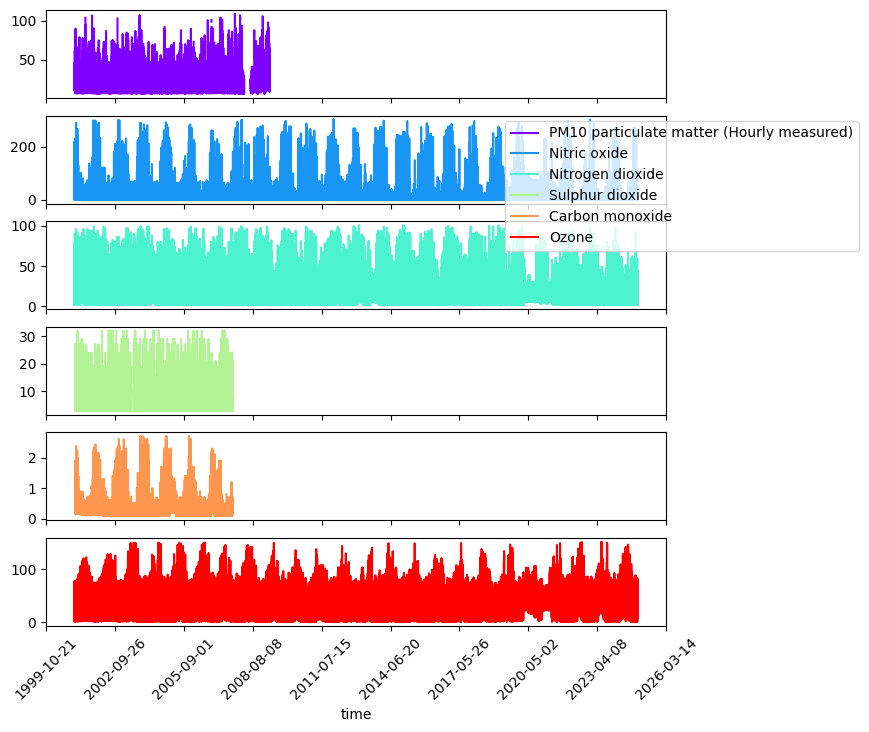

In [62]:
plot_timeseries(ds_test, columns_of_interest)

Training on 29637 rows for target: PM10 particulate matter (Hourly measured)
Imputed 740 missing values in 'PM10 particulate matter (Hourly measured)'
 Validation MSE: 60.6499
 Validation R²: 0.5489
 Validation on 3293 samples


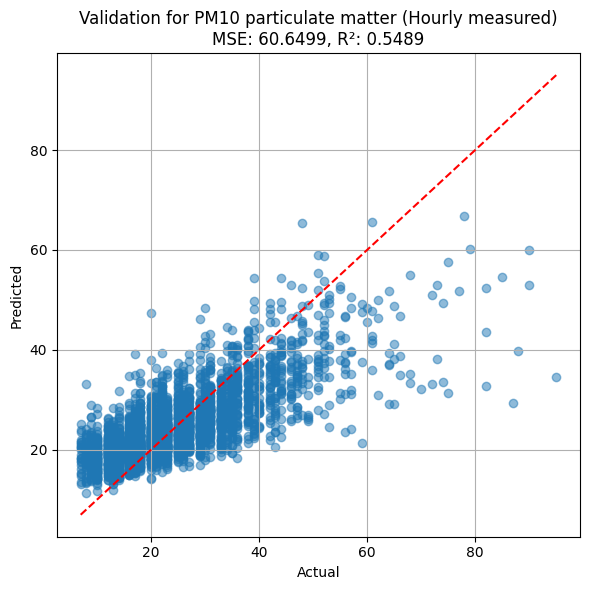

In [78]:
features = ['Nitric oxide', 'Nitrogen dioxide', 'Ozone', 'Carbon monoxide', 'hour',
       'weekday', 'month', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos', "Sulphur dioxide", 'weekday_cos', 'weekday_sin']

ds_dq_imp = impute_pollutant_with_model(ds_dq_imp, 'PM10 particulate matter (Hourly measured)', features, n_lags=1, 
    rolling_window=24,
    plot=True)

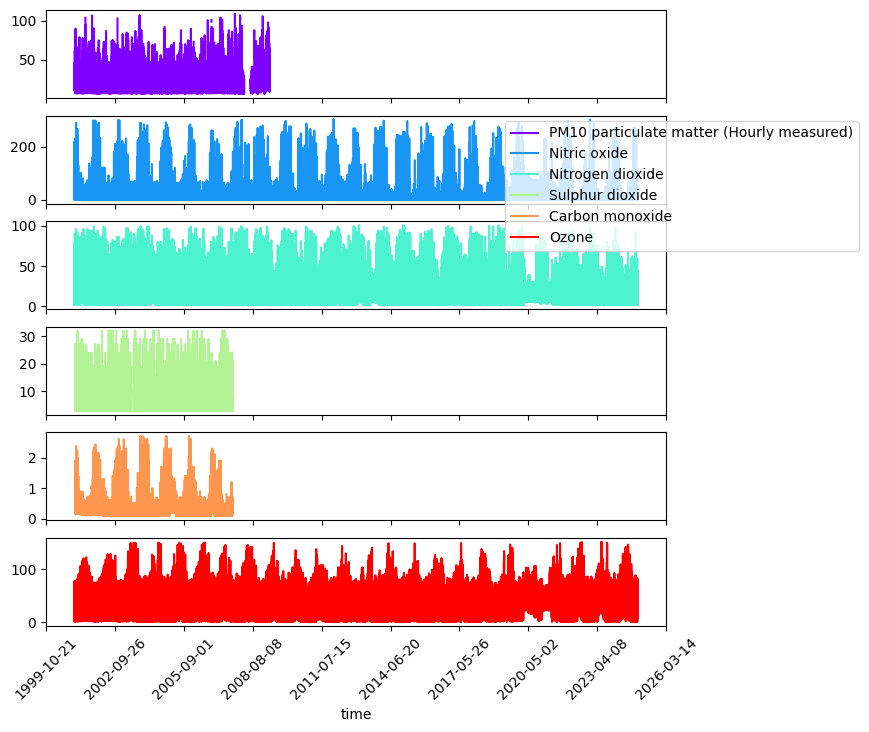

In [84]:
plot_timeseries(ds_dq_imp, columns_of_interest)

Training on 24722 rows for target: Sulphur dioxide
Imputed 12683 missing values in 'Sulphur dioxide'
 Validation MSE: 9.4051
 Validation R²: 0.3338
 Validation on 2746 samples


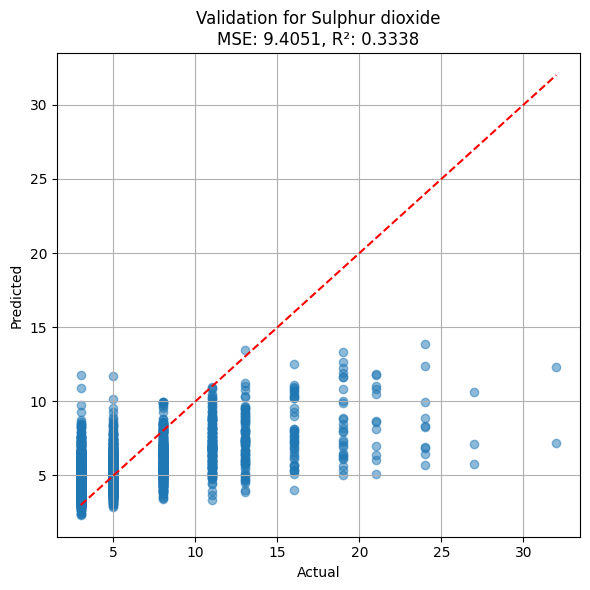

In [ ]:
features = ['Nitric oxide', 'Nitrogen dioxide', 'Ozone', 'PM10 particulate matter (Hourly measured)', 'hour',
       'weekday', 'month', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'Carbon monoxide',  'weekday_cos', 'weekday_sin']
ds_dq_imp = impute_pollutant_with_model(ds_dq_imp, "Sulphur dioxide", features, n_lags=1, 
    rolling_window=48,
    plot=True)